## A. Import Python Modules and Dataset

The approach I will take to preparing this data set is as follows:-

1. Take a look at the data to see if there is anything obvious that jumps out
1. Examine missing values and impute values if appropriate
1. Encode categorical data
1. _Normalise_ remaining numeric data fields

In [620]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [621]:
df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [622]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

### Make a copy

Make a copy of the dataset before we start preparing the data, so that we can reset if needs be and/or compare before & after situations at any stage.

In [623]:
df_original = df.copy(deep=True)

In [661]:
#run this to reset the dataset
df = df_original.copy(deep=True)
df.tail(100)

age           job   marital  education default  balance housing loan  \
1900  67.0       retired   married  secondary      no     2048      no   no   
1901  41.0    management   married   tertiary      no        0      no   no   
1902  35.0        admin.    single  secondary      no      303      no   no   
1903  81.0       retired  divorced    primary      no      949      no   no   
1904  60.0    management   married   tertiary      no      315      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1900   cellular   16   sep       452         5    195         4    other   
1901   cellular   17   sep       294         4     63        11    other   
1902   cellular   24   sep       173         2    190        10    other   
1903   cellular   27   sep       188         2    280         1    other   
1904   cellular    1   sep       840         1    183         3  success   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1900        yes  
1901        yes  
1902        yes  
1903        yes  
1904        yes  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[100 rows x 17 columns]

## 1. Take a look at the data

First I will take a look at the data to see if there any any obvious features or issues.

In [662]:
print(df.describe(include='all'))

                age         job  marital  education default       balance  \
count   1988.000000        1990     2000       1896    2000   2000.000000   
unique          NaN          11        3          3       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         461     1111        995    1985           NaN   
mean      41.753018         NaN      NaN        NaN     NaN   1413.663500   
std       12.724358         NaN      NaN        NaN     NaN   3131.224213   
min       18.000000         NaN      NaN        NaN     NaN   -980.000000   
25%       32.000000         NaN      NaN        NaN     NaN    201.500000   
50%       38.000000         NaN      NaN        NaN     NaN    551.000000   
75%       50.000000         NaN      NaN        NaN     NaN   1644.500000   
max       93.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing  loan   contact          day month     duration     campaign

In [663]:
df[['age','balance','day','duration','campaign','pdays','previous']].skew()

age          0.853921
balance     11.461564
day          0.403661
duration     2.045787
campaign     2.320856
pdays        0.920006
previous     5.461168
dtype: float64

In [664]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


### Observations after looking at the data

#### Missing values
A number of fields are missinf data values, some more significant that others. Age (12 missing values), job (10) are missing relativelt insignificant amounts of data, yet we should be able to impute values for these so as to maximase the amount of data we have to work with subsequently. Education (104) and contact (191) are a little more significant. However, with only three values apprantly in use (out of a possible 11 values) we again should be able to impute values for education, as presumably everyone has at least a primary level of education. Contact data will require further thought and perhaps null values are appropriate here. Poutcome contains a lot of null values, but again this may be reasonable given that not everyone may have been contacted for the most recent campaign.

#### Data types & values
We can see that there are a number of **numeric** data types (age, balance) that we should be able to scale reasonably well. We note that this data is skewed towards the right hand tail (particularly the balance data) so we will need to make some effort to _normalise_ this data somewhat. There are a few numeric columns that may be useful when analysing the marketing campaigns (duration, campaign, pdays, previous) which again are slightly skewed. Pdays contains a value of -1 which possible means they have not previously been contacted, although the documentation suggests 999 should have been used for this. Perhaps some of these values can be split into appropriate categories. Finally we see day, which represents the day of the month that custeroms were last contacted. This is the least skewed, but in fact it is actually cyclical data - we may have to consider this in conjunction with month.

The remaining fields contain **text** values. This are either classifiers (such as job, education, etc..) or binary flags (such as (loan, housing, subscribed). There are some dominant values such as job=management (almost 1/4 of records) or month=feb (just over 1/5 records), so a column by column approach will be taken to preparing each of these.


In [666]:
print('\n**** Job Distribution ****\n{}'.format(df.groupby('job').size()))
print('\n**** Marital Distribution ****\n{}'.format(df.groupby('marital').size()))
print('\n**** Education Distribution ****\n{}'.format(df.groupby('education').size()))
print('\n**** Default Distribution ****\n{}'.format(df.groupby('default').size()))
print('\n**** Housing Distribution ****\n{}'.format(df.groupby('housing').size()))
print('\n**** Loan Distribution ****\n{}'.format(df.groupby('loan').size()))
print('\n**** Contact Distribution ****\n{}'.format(df.groupby('contact').size()))
print('\n**** Month Distribution ****\n{}'.format(df.groupby('month').size()))
print('\n**** POutcome Distribution ****\n{}'.format(df.groupby('poutcome').size()))
print('\n**** Subscribed Distribution ****\n{}'.format(df.groupby('subscribed').size()))



**** Job Distribution ****
job
admin.           247
blue-collar      298
entrepreneur      45
housemaid         35
management       461
retired          162
self-employed     64
services         165
student           96
technician       348
unemployed        69
dtype: int64

**** Marital Distribution ****
marital
divorced     215
married     1111
single       674
dtype: int64

**** Education Distribution ****
education
primary      217
secondary    995
tertiary     684
dtype: int64

**** Default Distribution ****
default
no     1985
yes      15
dtype: int64

**** Housing Distribution ****
housing
no     1037
yes     963
dtype: int64

**** Loan Distribution ****
loan
no     1750
yes     250
dtype: int64

**** Contact Distribution ****
contact
cellular     1663
telephone     146
dtype: int64

**** Month Distribution ****
month
apr    205
aug    136
dec     41
feb    404
jan    245
jul    167
jun    104
mar     70
may    333
nov     68
oct     93
sep    134
dtype: int64

**** POutcome Di

## 2. Treatment of Missing Values 

In [667]:
#Check for missing values...
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

#### Age
Age is missing 12 values (<1%), so how would be approximate that? Let's take a median age after filtering the data by two other attributes (_eventually decided upon job & subscribed_)

In [668]:
#Temporarily copying the df and dropping age=NaN so we can plot on seaborn boxplot
df_temp = df.copy(deep=True)
df_temp = df_temp.dropna(subset=['age'])

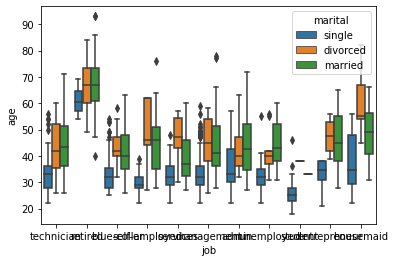

In [669]:
sns.boxplot(y=df_temp['age'], x=df_temp['job'], hue=df_temp['marital'])
plt.title("")
plt.show()

In [670]:
ptable = df_temp.pivot_table(values='age', 
                        index='job',
                        columns=['marital'],  
                        aggfunc=np.median)
#we no longer need this temp datafram
del df_temp
#lets have a look at the pivot table
print(type(ptable))
ptable

<class 'pandas.core.frame.DataFrame'>


marital        divorced  married  single
job                                     
admin.             40.0     42.5    33.0
blue-collar        42.0     40.0    32.0
entrepreneur       47.5     45.0    34.5
housemaid          55.0     49.0    34.5
management         45.0     41.0    32.0
retired            67.0     67.0    60.5
self-employed      46.0     46.0    29.0
services           47.0     37.0    32.0
student            38.0     33.0    25.0
technician         42.0     43.5    33.0
unemployed         40.0     43.0    32.0

In [671]:
missing_age_idx = df[df['age'].isna()].index

In [672]:
df[df['age'].isna()]

age            job  marital  education default  balance housing loan  \
456   NaN  self-employed  married   tertiary      no      917      no   no   
472   NaN    blue-collar  married    primary      no      474     yes  yes   
526   NaN       services  married  secondary      no     2478     yes   no   
595   NaN     management  married   tertiary      no     1857      no   no   
597   NaN  self-employed  married  secondary     yes      254     yes  yes   
601   NaN         admin.   single  secondary      no      111     yes   no   
605   NaN     management  married   tertiary      no     1330     yes   no   
744   NaN     management  married   tertiary      no      -61      no   no   
795   NaN     technician   single   tertiary      no      992     yes   no   
1171  NaN        retired  married   tertiary      no     2812      no   no   
1232  NaN        student   single  secondary      no      431      no   no   
1408  NaN  self-employed   single   tertiary      no      251      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
456    cellular    6   feb       518         3    212         5  failure   
472   telephone    9   feb       152         3    221         1  failure   
526    cellular   28   jan       347         1    230         1  failure   
595    cellular   29   jan       386         1    168         4  failure   
597    cellular   29   jan       194         1    188         1  failure   
601    cellular   29   jan        55         1    195         3  failure   
605    cellular   29   jan        41         2    261         1  failure   
744    cellular   30   jan        90         5    172         1  failure   
795    cellular    4   may       301         1     88         2  success   
1171   cellular    3   aug       392         4    181         3  success   
1232   cellular   19   aug       418        11    185         5  success   
1408   cellular   12   jul       537         1     -1         0      NaN   

     subscribed  
456          no  
472          no  
526          no  
595          no  
597          no  
601          no  
605          no  
744          no  
795          no  
1171        yes  
1232        yes  
1408        yes

In [673]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job'], x['marital']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [674]:
df.loc[missing_age_idx]

age            job  marital  education default  balance housing loan  \
456   46.0  self-employed  married   tertiary      no      917      no   no   
472   40.0    blue-collar  married    primary      no      474     yes  yes   
526   37.0       services  married  secondary      no     2478     yes   no   
595   41.0     management  married   tertiary      no     1857      no   no   
597   46.0  self-employed  married  secondary     yes      254     yes  yes   
601   33.0         admin.   single  secondary      no      111     yes   no   
605   41.0     management  married   tertiary      no     1330     yes   no   
744   41.0     management  married   tertiary      no      -61      no   no   
795   33.0     technician   single   tertiary      no      992     yes   no   
1171  67.0        retired  married   tertiary      no     2812      no   no   
1232  25.0        student   single  secondary      no      431      no   no   
1408  29.0  self-employed   single   tertiary      no      251      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
456    cellular    6   feb       518         3    212         5  failure   
472   telephone    9   feb       152         3    221         1  failure   
526    cellular   28   jan       347         1    230         1  failure   
595    cellular   29   jan       386         1    168         4  failure   
597    cellular   29   jan       194         1    188         1  failure   
601    cellular   29   jan        55         1    195         3  failure   
605    cellular   29   jan        41         2    261         1  failure   
744    cellular   30   jan        90         5    172         1  failure   
795    cellular    4   may       301         1     88         2  success   
1171   cellular    3   aug       392         4    181         3  success   
1232   cellular   19   aug       418        11    185         5  success   
1408   cellular   12   jul       537         1     -1         0      NaN   

     subscribed  
456          no  
472          no  
526          no  
595          no  
597          no  
601          no  
605          no  
744          no  
795          no  
1171        yes  
1232        yes  
1408        yes

#### Job
Job is missing 10 values (<1%) and there is no overlap between the records missing age (immediately above) and these incomplete recrods. Everyone will have a job of some description (as student and unemployed are included as possible values), so this must be left out in error rather than by design. We will use a similar approach to that used for age age above, this time however we will use the most frequently occuring job after filtering the data by two other attributes (_eventually decided upon age & education_)


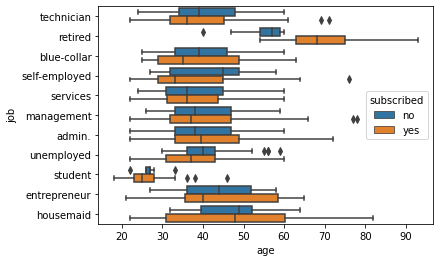

In [675]:
#we will use age as a filter for imputing job, but we will do so on categories, so let's add a new feature
df['age_cat'] = ((df['age']//10)*10).astype('int64')

#Temporarily copying the df and dropping age=NaN so we can plot on seaborn boxplot
df_temp = df.copy(deep=True)
df_temp = df_temp.dropna(subset=['job'])

sns.boxplot(y=df_temp['job'], x=df_temp['age'], hue=df_temp['subscribed'])
plt.title("")
plt.show()

#we need to create the pivot table manually. See below....


In [676]:
#As we are dealing with text data we would like to use mode as the aggregate function, but this is not possbile
#Therefore, we will manually create the pivot table using the following attributes (education & age)
ed_arr = df_temp[df_temp['education'].notnull()]['education'].unique()
sub_arr = df_temp[df_temp['subscribed'].notnull()]['subscribed'].unique()
age_arr = df_temp[df_temp['age_cat'].notnull()]['age_cat'].unique().astype(int)

#create an array of the correct size
temp_arr = np.empty(shape=(len(age_arr),len(sub_arr)),dtype='str')
#now convert to a dataframe
job_piv_tbl = pd.DataFrame(temp_arr, columns=sub_arr, index=sorted(age_arr))
tmp = df_temp['job'].groupby([df_temp['age_cat'], df_temp['subscribed']])
for t in tmp:
    job_piv_tbl.at[t[0][0],t[0][1]] = str(t[1].mode()[0])
print(job_piv_tbl)

#now that we have created the pivot table we can drop the temporary dataframe...
del df_temp

             no         yes
10                  student
20  blue-collar     student
30   management  management
40  blue-collar  management
50   management  management
60      retired     retired
70                  retired
80                  retired
90                  retired


In [677]:
missing_job_idx = df[df['job'].isna()].index

In [678]:
#look at the data before we impute for null values
df.iloc[missing_job_idx]

age  job  marital  education default  balance housing loan    contact  \
255   42.0  NaN   single    primary      no     2398     yes   no   cellular   
257   46.0  NaN  married        NaN      no      677      no   no   cellular   
831   41.0  NaN   single    primary      no     2398     yes   no        NaN   
1223  55.0  NaN  married  secondary      no     2206      no   no   cellular   
1281  50.0  NaN  married        NaN      no      558      no   no   cellular   
1669  54.0  NaN  married  secondary      no     2206      no   no   cellular   
1711  77.0  NaN  married        NaN      no      397      no   no  telephone   
1801  28.0  NaN   single        NaN      no      326      no   no   cellular   
1868  48.0  NaN   single        NaN      no     1819      no   no   cellular   
1975  45.0  NaN  married   tertiary      no      406      no   no   cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  \
255     3   feb       144         2    271         2  failure         no   
257     3   feb       425         1     82         1  failure         no   
831     8   may       287         2     -1         0      NaN         no   
1223   12   aug       265         1     91         5  success        yes   
1281    9   jul       464         1    683         6  failure        yes   
1669   13   may       260         1     91         4  success        yes   
1711    7   may       300         3     -1         0      NaN        yes   
1801   11   oct       450         1    231         1  success        yes   
1868    2   sep      1440         1    458         1  failure        yes   
1975    7   sep       314         1     -1         0      NaN        yes   

      age_cat  
255        40  
257        40  
831        40  
1223       50  
1281       50  
1669       50  
1711       70  
1801       20  
1868       40  
1975       40

In [679]:
# Define function to return an element of the pivot table
def get_job_element(x):
    return job_piv_tbl.loc[x['age_cat'], x['subscribed']]

# Replace missing values
df['job'].fillna(df[df['job'].isnull()].apply(get_job_element, axis=1), inplace=True)

In [680]:
#look at the data after we impute for null values
df.iloc[missing_job_idx]


age          job  marital  education default  balance housing loan  \
255   42.0  blue-collar   single    primary      no     2398     yes   no   
257   46.0  blue-collar  married        NaN      no      677      no   no   
831   41.0  blue-collar   single    primary      no     2398     yes   no   
1223  55.0   management  married  secondary      no     2206      no   no   
1281  50.0   management  married        NaN      no      558      no   no   
1669  54.0   management  married  secondary      no     2206      no   no   
1711  77.0      retired  married        NaN      no      397      no   no   
1801  28.0      student   single        NaN      no      326      no   no   
1868  48.0   management   single        NaN      no     1819      no   no   
1975  45.0   management  married   tertiary      no      406      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
255    cellular    3   feb       144         2    271         2  failure   
257    cellular    3   feb       425         1     82         1  failure   
831         NaN    8   may       287         2     -1         0      NaN   
1223   cellular   12   aug       265         1     91         5  success   
1281   cellular    9   jul       464         1    683         6  failure   
1669   cellular   13   may       260         1     91         4  success   
1711  telephone    7   may       300         3     -1         0      NaN   
1801   cellular   11   oct       450         1    231         1  success   
1868   cellular    2   sep      1440         1    458         1  failure   
1975   cellular    7   sep       314         1     -1         0      NaN   

     subscribed  age_cat  
255          no       40  
257          no       40  
831          no       40  
1223        yes       50  
1281        yes       50  
1669        yes       50  
1711        yes       70  
1801        yes       20  
1868        yes       40  
1975        yes       40

#### Education
Now we repeat the same steps for education. Again there are a relatively small number (18) of missing values, but in the interests of retaining as many data rows as possible we will impute some values.  Job would probably be a good column to use for imputing, but we have already imputed job values for some of the records that have missing educational levels, therefore we will use other features

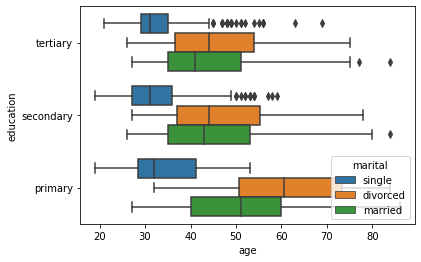

In [681]:
#Temporarily copying the df and dropping age=NaN so we can plot on seaborn boxplot
df_temp = df.copy(deep=True)
df_temp = df_temp.dropna(subset=['education'])

sns.boxplot(y=df_temp['education'], x=df_temp['age'], hue=df_temp['marital'])
plt.title("")
plt.show()

#we need to create the pivot table manually. See below....

In [682]:
#As we are dealing with text data we would like to use mode as the aggregate function, but this is not possbile
#Therefore, we will manually create the pivot table using the following attributes (education & age)
mar_arr = df[df['marital'].notnull()]['marital'].unique()
age_arr = df[df['age_cat'].notnull()]['age_cat'].unique().astype(int)

#create an array of the correct size
temp_arr = np.empty(shape=(len(age_arr),len(mar_arr)),dtype='str')
#now convert to a dataframe
ed_piv_tbl = pd.DataFrame(temp_arr, columns=mar_arr, index=sorted(age_arr))
tmp = df_temp['education'].groupby([df_temp['age_cat'], df_temp['marital']])
for t in tmp:
    ed_piv_tbl.at[t[0][0],t[0][1]] = str(t[1].mode()[0])
print(ed_piv_tbl)

#now that we have created the pivot table we can drop the temporary dataframe...
del df_temp

       single   divorced    married
10  secondary                      
20  secondary   tertiary  secondary
30   tertiary  secondary  secondary
40  secondary  secondary  secondary
50  secondary  secondary  secondary
60   tertiary  secondary  secondary
70               primary  secondary
80               primary    primary
90                                 


#### Incomplete pivot table...
We note that there are a few blanks in this pivot table - we will ignore the married/divorced teenagers as they are unlikely to exist, but we will set a default of primary for everyone over the age of 70

In [683]:
ed_piv_tbl.at['70','single'] = 'primary'
ed_piv_tbl.at['80','single'] = 'primary'
ed_piv_tbl.at['90','single'] = 'primary'
ed_piv_tbl.at['90','divorced'] = 'primary'
ed_piv_tbl.at['90',' married'] = 'primary'

In [684]:
missing_ed_idx = df[df['education'].isna()].index

In [685]:
#look at the data before we impute for null values
df.iloc[missing_ed_idx]

age          job  marital education default  balance housing loan  \
10    38.0   management   single       NaN      no      715     yes   no   
15    38.0  blue-collar  married       NaN      no        0     yes   no   
124   39.0  blue-collar  married       NaN      no        0      no   no   
209   37.0   management  married       NaN      no      247      no   no   
257   46.0  blue-collar  married       NaN      no      677      no   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
1944  39.0   management  married       NaN      no       76      no   no   
1972  29.0   unemployed   single       NaN      no     1584      no   no   
1985  21.0      student   single       NaN      no     1506      no   no   
1993  35.0   management  married       NaN      no     2326     yes  yes   
1995  20.0      student   single       NaN      no     2785      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
10    cellular    2   apr       951         1    132         3  failure   
15    cellular    2   apr       477         2    267         1  failure   
124   cellular    2   feb       731         1    193         3  failure   
209   cellular    2   feb       192         2    208         1  failure   
257   cellular    3   feb       425         1     82         1  failure   
...        ...  ...   ...       ...       ...    ...       ...      ...   
1944  cellular   15   sep       200         1    183         1  success   
1972  cellular    6   sep       245         1     -1         0      NaN   
1985  cellular   14   sep       340         1     -1         0      NaN   
1993  cellular   16   sep       319         1     -1         0      NaN   
1995  cellular   16   sep       327         2     -1         0      NaN   

     subscribed  age_cat  
10           no       30  
15           no       30  
124          no       30  
209          no       30  
257          no       40  
...         ...      ...  
1944        yes       30  
1972        yes       20  
1985        yes       20  
1993        yes       30  
1995        yes       20  

[104 rows x 18 columns]

In [686]:
# Define function to return an element of the pivot table
def get_ed_element(x):
    return ed_piv_tbl.loc[x['age_cat'], x['marital']]

# Replace missing values
df['education'].fillna(df[df['education'].isnull()].apply(get_ed_element, axis=1), inplace=True)

In [687]:
del job_piv_tbl

In [688]:
#look at the data after we impute for null values
df.iloc[missing_ed_idx]

age          job  marital  education default  balance housing loan  \
10    38.0   management   single   tertiary      no      715     yes   no   
15    38.0  blue-collar  married  secondary      no        0     yes   no   
124   39.0  blue-collar  married  secondary      no        0      no   no   
209   37.0   management  married  secondary      no      247      no   no   
257   46.0  blue-collar  married  secondary      no      677      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
1944  39.0   management  married  secondary      no       76      no   no   
1972  29.0   unemployed   single  secondary      no     1584      no   no   
1985  21.0      student   single  secondary      no     1506      no   no   
1993  35.0   management  married  secondary      no     2326     yes  yes   
1995  20.0      student   single  secondary      no     2785      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
10    cellular    2   apr       951         1    132         3  failure   
15    cellular    2   apr       477         2    267         1  failure   
124   cellular    2   feb       731         1    193         3  failure   
209   cellular    2   feb       192         2    208         1  failure   
257   cellular    3   feb       425         1     82         1  failure   
...        ...  ...   ...       ...       ...    ...       ...      ...   
1944  cellular   15   sep       200         1    183         1  success   
1972  cellular    6   sep       245         1     -1         0      NaN   
1985  cellular   14   sep       340         1     -1         0      NaN   
1993  cellular   16   sep       319         1     -1         0      NaN   
1995  cellular   16   sep       327         2     -1         0      NaN   

     subscribed  age_cat  
10           no       30  
15           no       30  
124          no       30  
209          no       30  
257          no       40  
...         ...      ...  
1944        yes       30  
1972        yes       20  
1985        yes       20  
1993        yes       30  
1995        yes       20  

[104 rows x 18 columns]

#### Contact & poutcome
When I consider the two remaining columns with NaN values, I think it is reasonable to leave both as is. 

For **contact** we see two distinct values _(cellular & telephone)_ and 191 records (approx 9.5%) with NaN values. This however is not unreasonable - many of these customers have not been contacted previously and presumably others may have been spoken to in the branch. It may well be that this is a case of missing data, but with the infomration provided we can draw no solid conclusions as to how this field could be accurately imputed.

With regard to **poutcome**, again it is reasonable to expect that there will be missing values. Perhaps not all customers were contacted in the last campaign and we can see that many of these customers were not involved in any previous campaigns. So we will retain the missing (NaN) values as they are.

In [689]:
df[df['contact'].isna() | df['poutcome'].isna()]

age           job   marital  education default  balance housing loan  \
799   33.0   blue-collar   married    primary     yes     -744     yes   no   
800   60.0       retired   married    primary      no       -2     yes   no   
801   33.0    technician    single   tertiary      no      129     yes   no   
802   33.0      services  divorced  secondary      no      411     yes   no   
803   47.0    management   married   tertiary      no      643     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single  secondary      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
799         NaN    8   may       206         1     -1         0      NaN   
800         NaN    8   may        75         1     -1         0      NaN   
801         NaN    8   may       128         1     -1         0      NaN   
802         NaN    8   may       216         1     -1         0      NaN   
803         NaN    8   may       155         1     -1         0      NaN   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  age_cat  
799          no       30  
800          no       60  
801          no       30  
802          no       30  
803          no       40  
...         ...      ...  
1995        yes       20  
1996        yes       20  
1997        yes       80  
1998        yes       40  
1999        yes       40  

[461 rows x 18 columns]

In [690]:
#Check for missing values...
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
age_cat         0
dtype: int64

## 3. Encode categorical data
There are a number of columns which are suitable for use of one-hot encoding in their current state. These are job, marital, education, default, housing, loan, contact, poutcome & subscribed. This will be completed in the following section.

The following numeric & date fields will be discussed in the next section - age, balance, day/month

Which leaves us with the following fields to be considered before we complete encoding - duration, campaign, pdays, previous. Let's start by looking at a description of the data in these fields again, the skewness of this data and then plotting a histogram of each.


In [691]:
df[['duration', 'campaign', 'pdays', 'previous']].describe()

duration     campaign        pdays     previous
count  2000.000000  2000.000000  2000.000000  2000.000000
mean    292.020500     1.909500   167.896000     2.561500
std     221.557295     1.378862   131.754126     3.400735
min       7.000000     1.000000    -1.000000     0.000000
25%     146.000000     1.000000    75.750000     1.000000
50%     236.000000     1.000000   182.000000     2.000000
75%     379.000000     2.000000   251.000000     3.000000
max    1823.000000    11.000000   854.000000    55.000000

In [692]:
df[['duration', 'campaign', 'pdays', 'previous']].skew()

duration    2.045787
campaign    2.320856
pdays       0.920006
previous    5.461168
dtype: float64

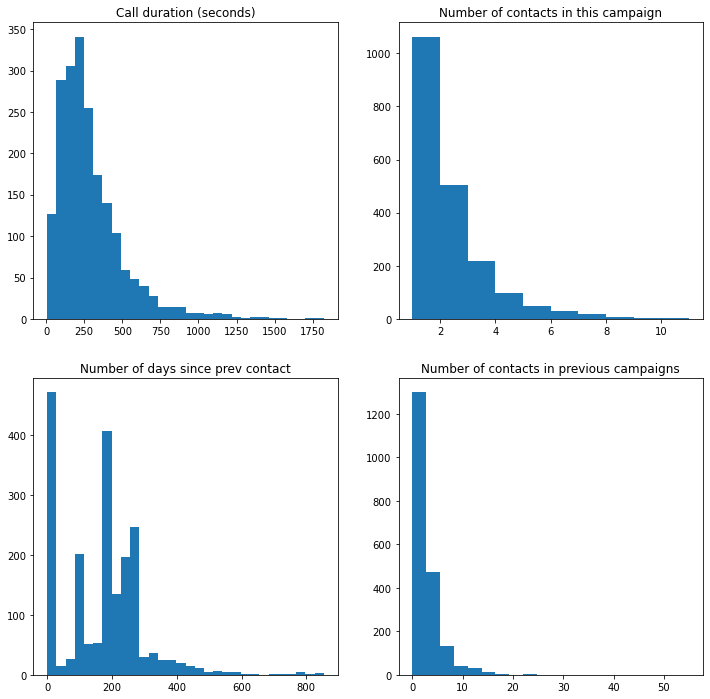

In [693]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['duration'], bins=30)
plt.title('Call duration (seconds)')
plt.subplot(2, 2, 2)
plt.hist(df['campaign'], bins=10)
plt.title('Number of contacts in this campaign')
plt.subplot(2, 2, 3)
plt.hist(df['pdays'], bins=30)
plt.title('Number of days since prev contact')
plt.subplot(2, 2, 4)
plt.hist(df['previous'], bins=20)
plt.title('Number of contacts in previous campaigns')
chart = plt.show()

It would appear that contacts for this campaign and previous campaigns could be classified as follows could be classified as follows:-
- 0 contacts   : Never
- 1-2 contacts : Moderate
- 3-5 contacts : Reasonable
- 5+ contacts  : Excessive

Number of days since previous contact could be classified thus:-
- Never
- Within the last week
- Within the last month
- Within the last 3 months
- Within the last 6 months
- Within the last 1 year
- Longer than 1 year

Duration appears like it should be dealt with as a regular numberic value, but scaler appropriately

In [694]:
#Contact days
contact_bins= [0,1,3,5,np.inf]
contact_labels = ['never','moderate','reasonable','excessive']
df['campaign'] = pd.cut(df['campaign'], bins=contact_bins, labels=contact_labels)
df['previous'] = pd.cut(df['previous'], bins=contact_bins, labels=contact_labels)
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single  secondary      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cellular    1   apr       957  moderate    131  moderate  failure   
1      cellular    1   apr       233  moderate    133     never  failure   
2      cellular    1   apr       126  moderate    239     never  failure   
3      cellular    1   apr       274     never    238  moderate  failure   
4      cellular    1   apr       479     never    307     never  failure   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327  moderate     -1       NaN      NaN   
1996   cellular   16   sep      1334  moderate     -1       NaN      NaN   
1997  telephone   17   sep       231     never     -1       NaN      NaN   
1998        NaN   20   sep       185     never     -1       NaN      NaN   
1999   cellular   22   sep       208  moderate     -1       NaN      NaN   

     subscribed  age_cat  
0            no       30  
1            no       30  
2            no       50  
3            no       40  
4            no       50  
...         ...      ...  
1995        yes       20  
1996        yes       20  
1997        yes       80  
1998        yes       40  
1999        yes       40  

[2000 rows x 18 columns]

In [695]:
#pdays
pday_bins= [-5,0,7,30,91,182,365,np.inf]
pday_labels = ['never','this_week','this_month','this_quarter', 'this_6months', 'this_year', 'over_a_year']
df['pdays'] = pd.cut(df['pdays'], bins=pday_bins, labels=pday_labels)
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single  secondary      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign         pdays  previous  \
0      cellular    1   apr       957  moderate  this_6months  moderate   
1      cellular    1   apr       233  moderate  this_6months     never   
2      cellular    1   apr       126  moderate     this_year     never   
3      cellular    1   apr       274     never     this_year  moderate   
4      cellular    1   apr       479     never     this_year     never   
...         ...  ...   ...       ...       ...           ...       ...   
1995   cellular   16   sep       327  moderate         never       NaN   
1996   cellular   16   sep      1334  moderate         never       NaN   
1997  telephone   17   sep       231     never         never       NaN   
1998        NaN   20   sep       185     never         never       NaN   
1999   cellular   22   sep       208  moderate         never       NaN   

     poutcome subscribed  age_cat  
0     failure         no       30  
1     failure         no       30  
2     failure         no       50  
3     failure         no       40  
4     failure         no       50  
...       ...        ...      ...  
1995      NaN        yes       20  
1996      NaN        yes       20  
1997      NaN        yes       80  
1998      NaN        yes       40  
1999      NaN        yes       40  

[2000 rows x 18 columns]

#### Now lets encode all of this data

In [696]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
#then the remaining fields with no NaN's
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'subscribed'],
                    drop_first=False)
df.tail(10)

age  balance  day month  duration  age_cat  contact_telephone  \
1990  36.0      376   16   sep       173       30                  0   
1991  39.0      112   16   sep       574       30                  0   
1992  78.0      527   16   sep       193       70                  0   
1993  35.0     2326   16   sep       319       30                  0   
1994  26.0      655   16   sep       190       20                  0   
1995  20.0     2785   16   sep       327       20                  0   
1996  28.0      127   16   sep      1334       20                  0   
1997  81.0     1154   17   sep       231       80                  1   
1998  46.0     4343   20   sep       185       40                  0   
1999  40.0     6403   22   sep       208       40                  0   

      contact_nan  poutcome_other  poutcome_success  ...  pdays_this_quarter  \
1990            0               0                 0  ...                   0   
1991            0               0                 0  ...                   0   
1992            0               0                 0  ...                   0   
1993            0               0                 0  ...                   0   
1994            0               0                 0  ...                   0   
1995            0               0                 0  ...                   0   
1996            0               0                 0  ...                   0   
1997            0               0                 0  ...                   0   
1998            1               0                 0  ...                   0   
1999            0               0                 0  ...                   0   

      pdays_this_6months  pdays_this_year  pdays_over_a_year  previous_never  \
1990                   0                0                  0               0   
1991                   0                0                  0               0   
1992                   0                0                  0               0   
1993                   0                0                  0               0   
1994                   0                0                  0               0   
1995                   0                0                  0               0   
1996                   0                0                  0               0   
1997                   0                0                  0               0   
1998                   0                0                  0               0   
1999                   0                0                  0               0   

      previous_moderate  previous_reasonable  previous_excessive  \
1990                  0                    0                   0   
1991                  0                    0                   0   
1992                  0                    0                   0   
1993                  0                    0                   0   
1994                  0                    0                   0   
1995                  0                    0                   0   
1996                  0                    0                   0   
1997                  0                    0                   0   
1998                  0                    0                   0   
1999                  0                    0                   0   

      subscribed_no  subscribed_yes  
1990              0               1  
1991              0               1  
1992              0               1  
1993              0               1  
1994              0               1  
1995              0               1  
1996              0               1  
1997              0               1  
1998              0               1  
1999              0               1  

[10 rows x 52 columns]

### Now lets tidy up the numerical data
- Age
- Balance
- Duration

Given that they are all skewed and contain outliers I will use a robust scaler and a log transformation on the data to bring to an appropriate scale

Then we will use sin & cos to represent the cyclical date information (day/month)

In [697]:
scaler = RobustScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['balance'] = scaler.fit_transform(df[['balance']])
df['duration'] = scaler.fit_transform(df[['duration']])

Text(0.5, 1.0, 'Call duration (after robust scaler applied)')

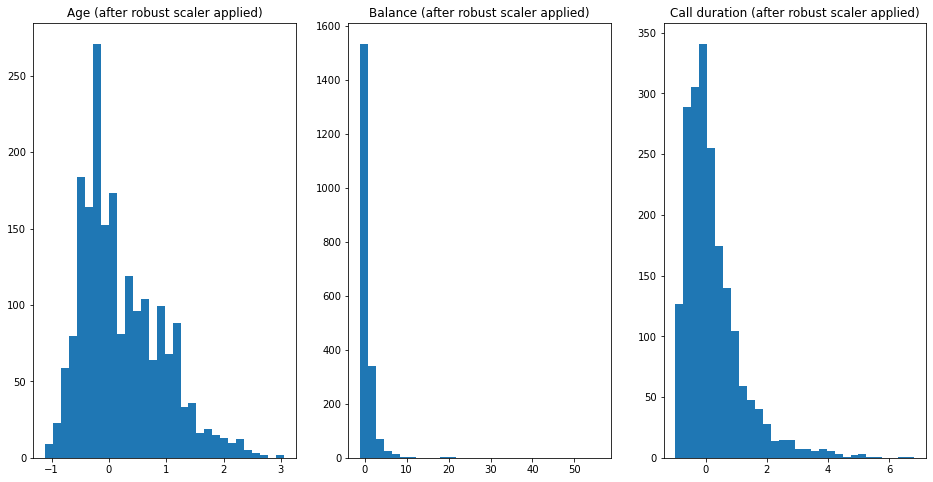

In [698]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=30)
plt.title('Age (after robust scaler applied)')
plt.subplot(1, 3, 2)
plt.hist(df['balance'], bins=30)
plt.title('Balance (after robust scaler applied)')
plt.subplot(1, 3, 3)
plt.hist(df['duration'], bins=30)
plt.title('Call duration (after robust scaler applied)')

Age looks the most normalised, but all are still off centre with a longer tail to the right. We will offset the data (to eliminate negative values) and apply a log transform to see if we can make them appear more gaussian! (Note all three datasets contain negative values)

In [699]:
#age
min_val=df['age'].min()
offset = abs(min_val-1)  #use this to shift all values right so as to bring min value up to 1
df['age']=np.log(df['age']+offset)
#balance
min_val=df['balance'].min()
offset = abs(min_val-1)  #use this to shift all values right so as to bring min value up to 1
df['balance']=np.log(df['balance']+offset)
#duration
min_val=df['duration'].min()
offset = abs(min_val-1)  #use this to shift all values right so as to bring min value up to 1
df['duration']=np.log(df['duration']+offset)


Text(0.5, 1.0, 'Call duration (after robust scaler applied)')

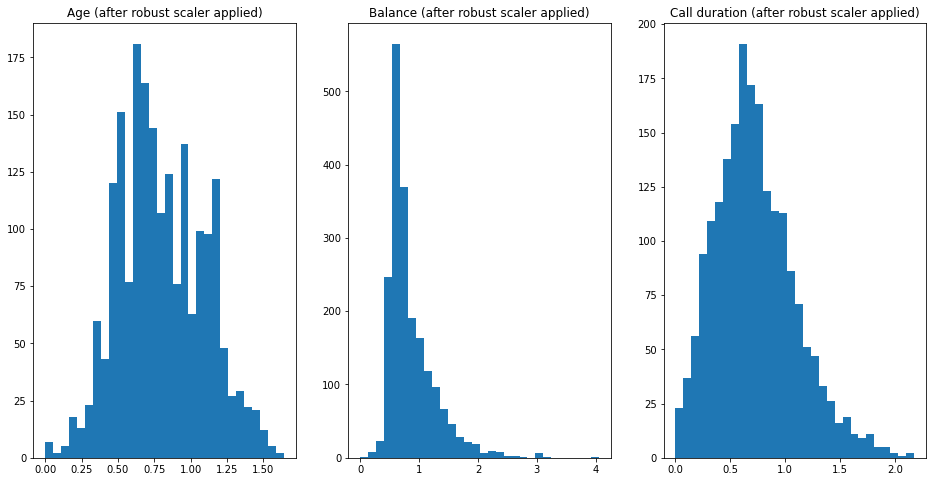

In [700]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=30)
plt.title('Age (after robust scaler applied)')
plt.subplot(1, 3, 2)
plt.hist(df['balance'], bins=30)
plt.title('Balance (after robust scaler applied)')
plt.subplot(1, 3, 3)
plt.hist(df['duration'], bins=30)
plt.title('Call duration (after robust scaler applied)')

This looks a little better for all datasets and ML algorithms should be able to handle this data better

Finally we look at the date information....

First I have included my initial approach
But then I changed tack after the webinar on Thursday and combined day / month to get the day of the year and then transformed this into sin& cos values to reflect the cyclical nature of this data

In [701]:
df["month_no"] = pd.to_datetime(df.month, format='%b', errors='coerce').dt.month
#df.drop('month', axis=1, inplace=True)  -- keep month for now... see below
df.tail(10)

age   balance  day month  duration  age_cat  contact_telephone  \
1990  0.693147  0.662538   16   sep  0.537923       30                  0   
1991  0.773190  0.563469   16   sep  1.233573       30                  0   
1992  1.466337  0.715081   16   sep  0.586832       70                  0   
1993  0.664976  1.191210   16   sep  0.849747       30                  0   
1994  0.367725  0.757556   16   sep  0.579647       20                  0   
1995  0.105361  1.283472   16   sep  0.864320       20                  0   
1996  0.441833  0.569369   16   sep  1.901403       20                  0   
1997  1.504077  0.907800   17   sep  0.673645       80                  1   
1998  0.938270  1.545186   20   sep  0.567555       40                  0   
1999  0.798508  1.810978   22   sep  0.622006       40                  0   

      contact_nan  poutcome_other  poutcome_success  ...  pdays_this_6months  \
1990            0               0                 0  ...                   0   
1991            0               0                 0  ...                   0   
1992            0               0                 0  ...                   0   
1993            0               0                 0  ...                   0   
1994            0               0                 0  ...                   0   
1995            0               0                 0  ...                   0   
1996            0               0                 0  ...                   0   
1997            0               0                 0  ...                   0   
1998            1               0                 0  ...                   0   
1999            0               0                 0  ...                   0   

      pdays_this_year  pdays_over_a_year  previous_never  previous_moderate  \
1990                0                  0               0                  0   
1991                0                  0               0                  0   
1992                0                  0               0                  0   
1993                0                  0               0                  0   
1994                0                  0               0                  0   
1995                0                  0               0                  0   
1996                0                  0               0                  0   
1997                0                  0               0                  0   
1998                0                  0               0                  0   
1999                0                  0               0                  0   

      previous_reasonable  previous_excessive  subscribed_no  subscribed_yes  \
1990                    0                   0              0               1   
1991                    0                   0              0               1   
1992                    0                   0              0               1   
1993                    0                   0              0               1   
1994                    0                   0              0               1   
1995                    0                   0              0               1   
1996                    0                   0              0               1   
1997                    0                   0              0               1   
1998                    0                   0              0               1   
1999                    0                   0              0               1   

      month_no  
1990         9  
1991         9  
1992         9  
1993         9  
1994         9  
1995         9  
1996         9  
1997         9  
1998         9  
1999         9  

[10 rows x 53 columns]

In [702]:
#Following Thursday's seminar I now see that numeric months may not be that helpful - lets try sin/cos of the day/month
#we don't have year, but for the puposes of calculating the day number I will plug in 2022. This is not a leap year, which is more than likely the case. Even if it is a leap year, one day's difference will not be significant

#I will count the days from the last date of the prev year, so that for instance 1st jan = day 1
ref_date = pd.to_datetime('31 dec 2021')
df['day_of_year'] = (pd.to_datetime('2022-'+ df['month'] + '-' + df['day'].astype(str), format='%Y-%b-%d') - ref_date).astype('timedelta64[D]')

df['sin_day_of_year'] = np.sin(2 * np.pi * df['day_of_year'] / 365) 
df['cos_day_of_year'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
df.tail(10)

age   balance  day month  duration  age_cat  contact_telephone  \
1990  0.693147  0.662538   16   sep  0.537923       30                  0   
1991  0.773190  0.563469   16   sep  1.233573       30                  0   
1992  1.466337  0.715081   16   sep  0.586832       70                  0   
1993  0.664976  1.191210   16   sep  0.849747       30                  0   
1994  0.367725  0.757556   16   sep  0.579647       20                  0   
1995  0.105361  1.283472   16   sep  0.864320       20                  0   
1996  0.441833  0.569369   16   sep  1.901403       20                  0   
1997  1.504077  0.907800   17   sep  0.673645       80                  1   
1998  0.938270  1.545186   20   sep  0.567555       40                  0   
1999  0.798508  1.810978   22   sep  0.622006       40                  0   

      contact_nan  poutcome_other  poutcome_success  ...  previous_never  \
1990            0               0                 0  ...               0   
1991            0               0                 0  ...               0   
1992            0               0                 0  ...               0   
1993            0               0                 0  ...               0   
1994            0               0                 0  ...               0   
1995            0               0                 0  ...               0   
1996            0               0                 0  ...               0   
1997            0               0                 0  ...               0   
1998            1               0                 0  ...               0   
1999            0               0                 0  ...               0   

      previous_moderate  previous_reasonable  previous_excessive  \
1990                  0                    0                   0   
1991                  0                    0                   0   
1992                  0                    0                   0   
1993                  0                    0                   0   
1994                  0                    0                   0   
1995                  0                    0                   0   
1996                  0                    0                   0   
1997                  0                    0                   0   
1998                  0                    0                   0   
1999                  0                    0                   0   

      subscribed_no  subscribed_yes  month_no  day_of_year  sin_day_of_year  \
1990              0               1         9        259.0        -0.967938   
1991              0               1         9        259.0        -0.967938   
1992              0               1         9        259.0        -0.967938   
1993              0               1         9        259.0        -0.967938   
1994              0               1         9        259.0        -0.967938   
1995              0               1         9        259.0        -0.967938   
1996              0               1         9        259.0        -0.967938   
1997              0               1         9        260.0        -0.972118   
1998              0               1         9        263.0        -0.982927   
1999              0               1         9        265.0        -0.988678   

      cos_day_of_year  
1990        -0.251190  
1991        -0.251190  
1992        -0.251190  
1993        -0.251190  
1994        -0.251190  
1995        -0.251190  
1996        -0.251190  
1997        -0.234491  
1998        -0.183998  
1999        -0.150055  

[10 rows x 56 columns]

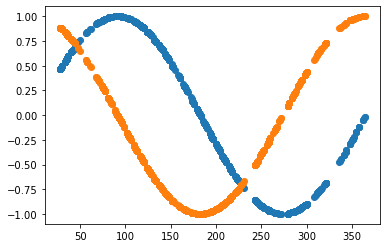

28.0
364.0


In [703]:
plt.scatter(df['day_of_year'], df['sin_day_of_year'])
plt.scatter(df['day_of_year'], df['cos_day_of_year'])
plt.show()

print(min(df['day_of_year']))
print(max(df['day_of_year']))

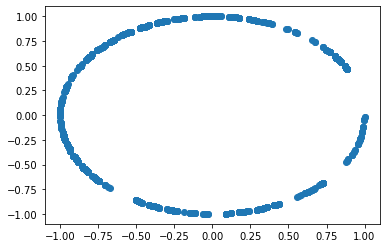

In [704]:
plt.scatter(df['cos_day_of_year'], df['sin_day_of_year'])
plt.show()

In [ ]:
#now lets save
df.to_csv('bank_train_prepared.csv')